In [1]:
#import pandas

import pandas as pd
from pandas import Series, DataFrame


In [2]:
#Save the test.csv into a dataframe

titanic = pd.read_csv('train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#get the info of dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# import libraries for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

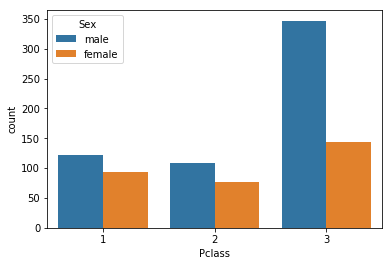

In [6]:
#Descriptive analysis to know more about the data

#plot to get gender distribution in each class

sns.countplot('Pclass', hue='Sex', data= titanic)

In [7]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age<16:
        return 'Child'

    else :
        return sex

In [8]:
titanic['Person_type'] = titanic[['Age','Sex']].apply(male_female_child, axis=1)

In [9]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


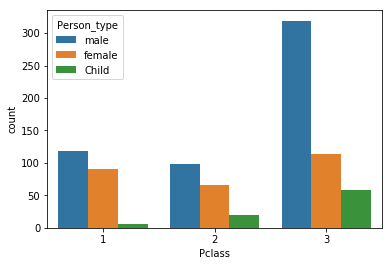

In [10]:
sns.countplot('Pclass', hue='Person_type', data=titanic)

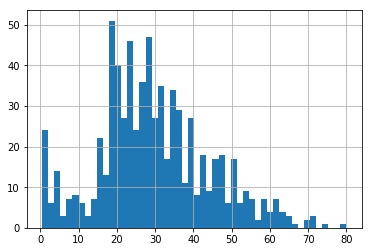

In [11]:
titanic['Age'].hist(bins=50)

In [12]:
titanic['Person_type'].value_counts()

male      537
female    271
Child      83
Name: Person_type, dtype: int64

C:\Users\Rithika_S\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


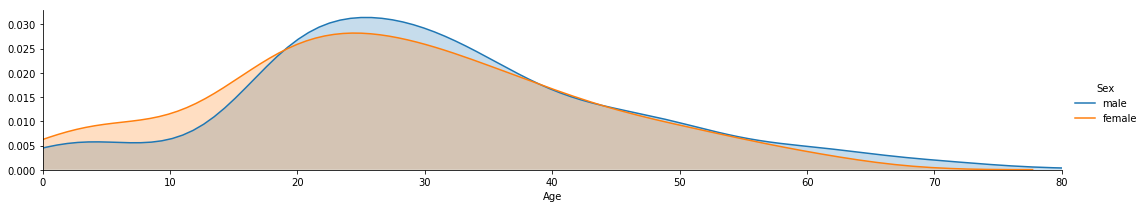

In [13]:
#plot to visualize multiple kde plots based on age

fig = sns.FacetGrid(data=titanic, hue='Sex', aspect= 5)

fig.map(sns.kdeplot, 'Age', shade = True)

#set x max limit to the oldest passenger

oldest = titanic['Age'].max()

#set boundaries for fig

fig.set(xlim=(0,oldest))

#Add legend

fig.add_legend()



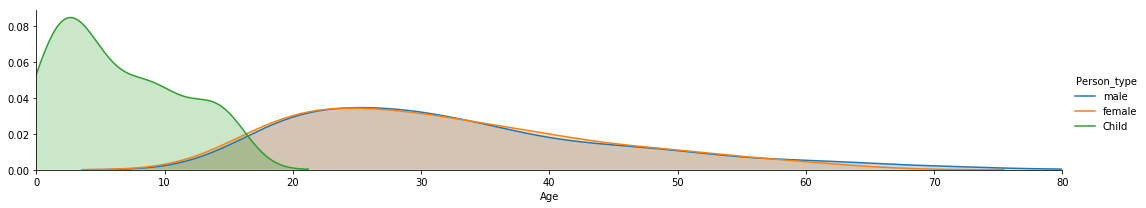

In [14]:
#plot to visualize multiple kde plots based on age

fig = sns.FacetGrid(data=titanic, hue='Person_type', aspect= 5)

fig.map(sns.kdeplot, 'Age', shade = True)

#set x max limit to the oldest passenger

oldest = titanic['Age'].max()

#set boundaries for fig

fig.set(xlim=(0,oldest))

#Add legend

fig.add_legend()



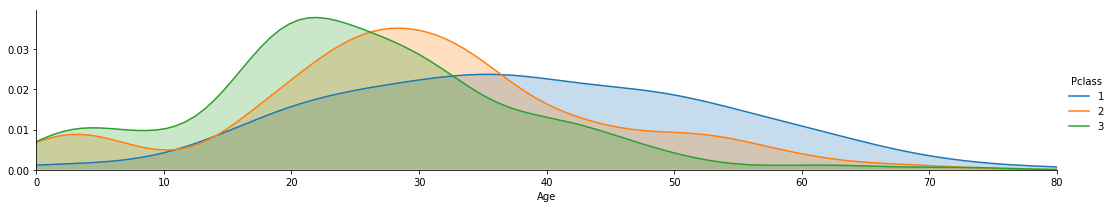

In [15]:
#plot to visualize multiple kde plots based on age

fig = sns.FacetGrid(data=titanic, hue='Pclass', aspect= 5)

fig.map(sns.kdeplot, 'Age', shade = True)

#set x max limit to the oldest passenger

oldest = titanic['Age'].max()

#set boundaries for fig

fig.set(xlim=(0,oldest))

#Add legend

fig.add_legend()



In [16]:
deck = titanic['Cabin'].dropna()

In [17]:
#make an emplty list
levels = []

for level in deck:
    levels.append(level[0])
    
#Make a Cabin dataframe and plot

Cabin_df = DataFrame(levels)
Cabin_df.head()
    

,0
0,C
1,C
2,E
3,G
4,C


In [18]:
Cabin_df.columns = ['cabin']

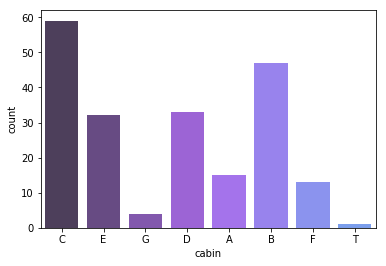

In [19]:
sns.countplot('cabin', palette = 'cool_d', data=Cabin_df)

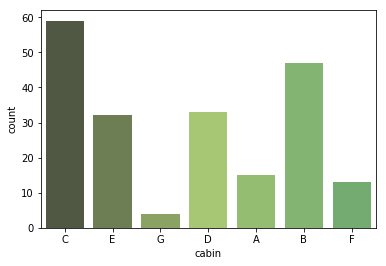

In [20]:
Cabin_df = Cabin_df[Cabin_df['cabin'] != 'T']
sns.countplot('cabin', palette = 'summer_d', data=Cabin_df)


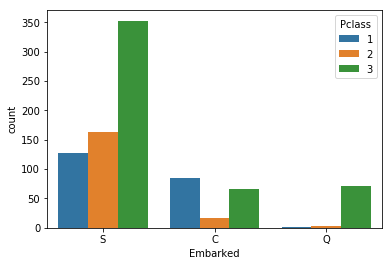

In [21]:
#to explore more and get to know where did the passengers come from

sns.countplot(x='Embarked', hue='Pclass' , data=titanic)

In [22]:
#exploring which passengers were alone and who were with family

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
titanic['Alone'] = titanic.SibSp + titanic.Parch

In [24]:
titanic['Alone'].loc[titanic['Alone'] > 0] ='with Family'
titanic['Alone'].loc[titanic['Alone'] == 0] ='Alone'


C:\Users\Rithika_S\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person_type,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


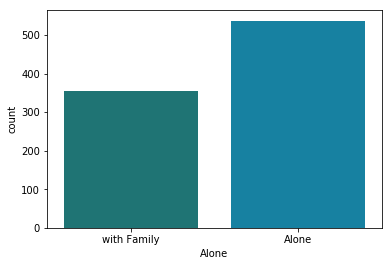

In [26]:
sns.countplot(x='Alone', palette = 'winter_d', data=titanic)

In [27]:
#Make a new column to check if the passenger has survived or not

titanic['Survivor'] = titanic.Survived.map({0:'No', 1:'Yes'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person_type,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


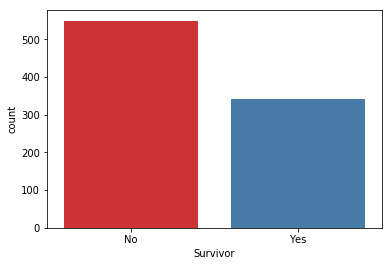

In [28]:
sns.countplot(x='Survivor', data=titanic, palette='Set1')

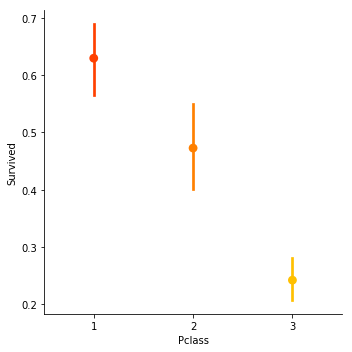

In [29]:
#plot to see how class had an effect on survival
sns.catplot(x='Pclass',y='Survived', kind='point' ,data=titanic, palette='autumn')

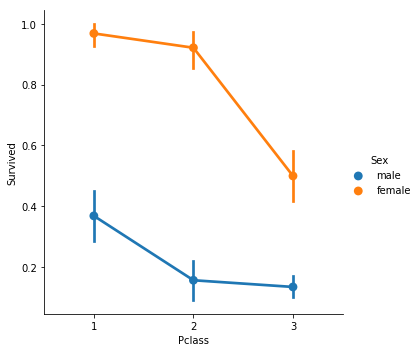

In [30]:
#plot to see how class and sex played together that led to survival
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic, hue='Sex')

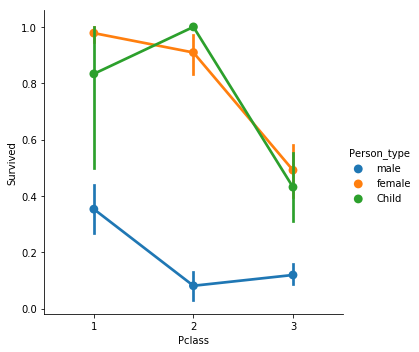

In [31]:
#plot to show how being either male female or child in one of the three classes affect survival
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic, hue='Person_type')

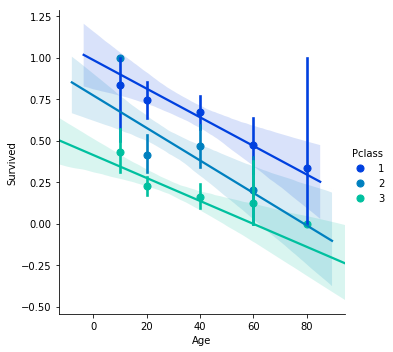

In [32]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic,palette='winter',x_bins=generations)

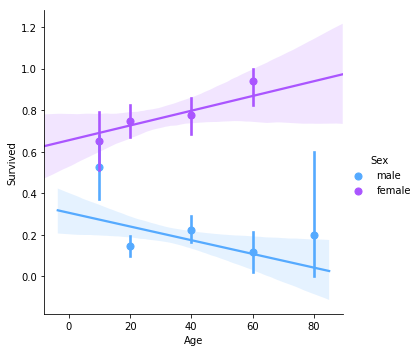

In [33]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic,palette='cool',x_bins=generations)

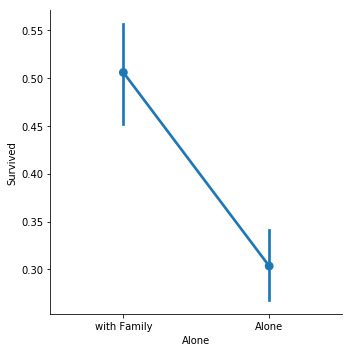

In [34]:
#Plot to show if having a family did affect the family m)ember
sns.catplot('Alone', 'Survived', kind= 'point', data= titanic)

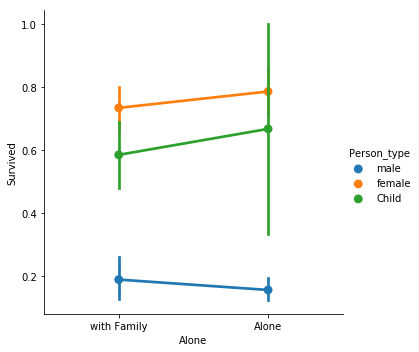

In [35]:
sns.catplot('Alone', 'Survived', kind= 'point', data= titanic, hue= 'Person_type')